# The relation between joining ITI and working in the software industry

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating the QS</h1></div>

> #### _`QS:`_ People have to join ITI to be able to work in the software industry?  
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Imports


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Data Exploration</h1></div>

## Read the Education data

In [153]:
education_df = pd.read_csv('../data/preprocessed-data/normalized csv/educations.csv')
print(education_df.shape)
education_df.head()

(1097, 6)


,University,Degree,Date,User,university_name,faculty_name
0,information technology institute (iti),nov 2021 - jun 2022,NaN,%D9%90%D9%90amiraelmergawy,#iti,NaN
1,ain shams university,"bachelor's degree, computer science",2016 - 2020,%D9%90%D9%90amiraelmergawy,ain shams,computer
2,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,-ezz,#iti,NaN
3,al-azhar university,geophysics and seismology,Sep 2015 - Aug 2019,-ezz,azhar,science
4,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,1212mohamedtaha,NaN,petroleum


## Read the Experiences data

In [154]:
experience_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
print(experience_df.shape)
experience_df.head()

(3403, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,Teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,Fullstack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",Software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",Software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software


## Filter Undergrads

In [155]:
experience_df = experience_df[(experience_df['title_tag'] != 'Internship') & (experience_df['EmploymentType'] != 'Internship')]
experience_df = experience_df[(experience_df['title_tag'] != 'Student')]
experience_df = experience_df[(experience_df['title_tag'] != 'Teaching')]
print(experience_df.shape)
experience_df.head()

(2673, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",Software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",Data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,NaN
10,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",Software


## Get the Last Job of each User

In [156]:
# every user has one job
experience_df = experience_df.groupby('User').last().reset_index()
print(experience_df.shape)

experience_df.head()

(820, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,Software
1,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,Data
2,3omarbadr,https://www.linkedin.com/company/3302698/,Numinix Web Development Ltd,software engineer,Full-time,2022-01-01,Aug 2022,8.0,"Alexandria, Egypt",Software
3,a-mohsen,https://www.linkedin.com/company/553347/,Appspro,oracle paas trainee,Part-time,2018-04-01,Jun 2018,3.0,"Cairo Governorate, Egypt",Software
4,a-nan-farag-b78a0b12b,https://www.linkedin.com/company/6538816/,ITG EGYPT,full stack engineer,Full-time,2016-12-01,Apr 2018,17.0,Villa 8 Mohamed Al Gizawi St. the First Settle...,Fullstack


## Get the experience of each user with & without ITI

In [157]:
# create a set of user who have iti in their education or in experience
tmp_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
iti_users = set(education_df[education_df['university_name'] == '#iti']['User'].unique())
iti_users.update(set(tmp_df[tmp_df['Company'].str.contains('\(ITI\)')]['User'].unique()))
iti_users = list(iti_users)
len(iti_users)

154

working_without_iti_df (572, 15)
working_with_iti_df (143, 15)


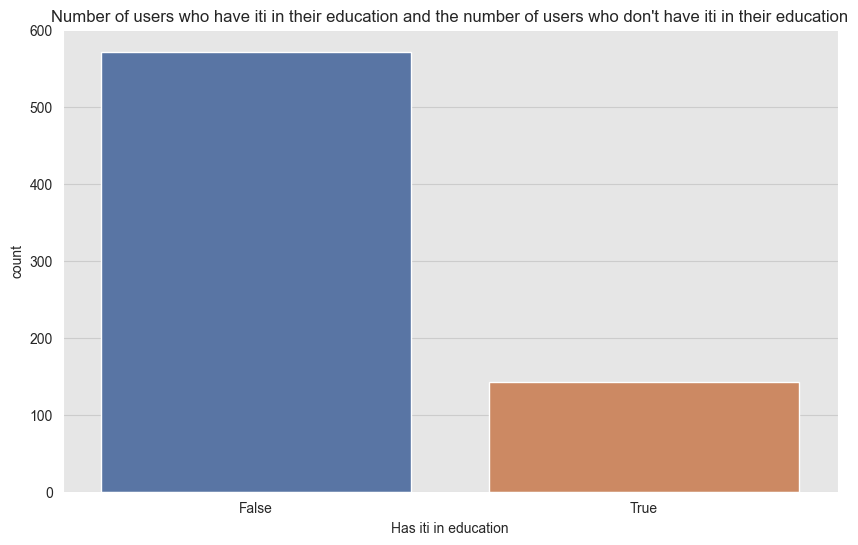

working_df (715, 16)


,User,University,Degree,Date,university_name,faculty_name
0,%D9%90%D9%90amiraelmergawy,information technology institute (iti),nov 2021 - jun 2022,2016 - 2020,#iti,computer
1,-ezz,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,#iti,science
2,1212mohamedtaha,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,None,petroleum
3,3omarbadr,information technology institute (iti),php full stack diploma,Mar 2021 - Aug 2021,#iti,computer
4,aabdelsattaar,information technology institute (iti),"deploma, unix department",2007 - 2008,#iti,art


In [158]:
# Get the users who have iti in their education
education_df_with_iti = education_df[education_df['User'].isin(iti_users)] 

# remove iti from education
# create education_df_with_iti with the difference between education_df and education_df_without_iti
education_df_without_iti = education_df[~education_df.isin(education_df_with_iti)].dropna()

# get first education
education_df_without_iti = education_df_without_iti.groupby('User').first().reset_index()
education_df_with_iti = education_df_with_iti.groupby('User').first().reset_index()

# join education and experience
working_without_iti_df = pd.merge(education_df_without_iti, experience_df, on='User', how='inner')
print("working_without_iti_df", working_without_iti_df.shape)

working_with_iti_df = pd.merge(education_df_with_iti, experience_df, on='User', how='inner')
print("working_with_iti_df", working_with_iti_df.shape)

working_df = pd.concat([working_with_iti_df, working_without_iti_df])
# add a column to indicate if the user has iti in his education or not
working_df['has_iti'] = working_df['User'].isin(iti_users)

# plot the number of users who have iti in their education and the number of users who don't have iti in their education
plt.figure(figsize=(10, 6))
sns.countplot(x='has_iti', data=working_df)
plt.title('Number of users who have iti in their education and the number of users who don\'t have iti in their education')
plt.xlabel('Has iti in education')
plt.ylabel('count')
plt.show()

print("working_df", working_df.shape)

education_df_with_iti.head()


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ People have to join ITI to be able to work in the software industry?  
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have more than 715 profiles for people working in the software industry and the size of each class is big enough to continue our analysis| _`Matches`_ |
>| The number of people working in the software industry who went to ITI is significantly bigger than those who didn't| - | - |
<br>


## Hypothesis Testing(McNemar's test)

McNemar's test is used to analyze paired categorical data, typically in a 2x2 contingency table. It assesses whether there is a significant difference in the marginal proportions between two related groups.

>> We can also interpret the results visually and say that there is a significant difference between the two groups.

In [159]:
from statsmodels.stats.contingency_tables import mcnemar
# >> Note: McNemar's test assumes that the observations are dependent, and it is typically used for matched or paired samples. 
# >> If the two groups in your data are independent, you may need to consider other statistical tests such as the chi-square test or Fisher's exact test.
# Hypothesis: There is a significant difference between the people who have ITI in their education and the people who don't have ITI in their education in terms of working in the software industry.
# Null Hypothesis: There is no significant difference between the people who have ITI in their education and the people who don't have ITI in their education in terms of working in the software industry.

# Construct the contingency table
contingency_table = [[len(working_without_iti_df), len(working_without_iti_df)],
                    [len(working_with_iti_df), len(working_with_iti_df)]]

# Perform McNemar's test
result = mcnemar(contingency_table, correction=False)

# Output the results
print(f"McNemar's chi-square statistic: {result.statistic:.2f}")
print(f"P-value: {result.pvalue:.4f}")

# Interpret the results
certainty = 0.95
alpha = 1- certainty
if result.pvalue < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")


McNemar's chi-square statistic: 143.00
P-value: 0.0000
There is a significant difference between the two groups.


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Stating & Refining QS</h1></div>

> #### _`QS:`_ People have to join ITI to be able to work in the software industry?  
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have more than 715 profiles for people working in the software industry and the size of each class is big enough to continue our analysis| _`Matches`_ |
>| The number of people working in the software industry and went to ITI is significantly bigger then those who didn't| Using the _`McNemar's test`_ we rejected the hypothesis| ❌ Our initial expectation does not align with the data we have collected. **Most of the people working in the software industry didn't go to ITI. However, the number of people who went to ITI is still significant.** Therefore, we need to modify our question to incorporate the insights gained from the data.|
<br>


> #### _`New QS:`_ People who are not a CS/CE graduates have to join ITI to be able to work in the software industry?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
<br>

## Define shifting a career to the software industry

#### _`Definition:`_ A person is considered to have shifted to the software industry if he/she has a job in the software industry and has a degree in a field other than computer science/engineering.
#### We stated the CS/CE degree as a requirement to make sure that the person has a background in the software industry and stated the job in the software industry as a requirement to make sure that the person is currently working in the software industry.

>> We defined the list of the faculties that are considered to be in the software industry in the next cell.


## Get the people who shifted their career to the software industry
i.e. Non-CS/CE graduates who are working in the software industry

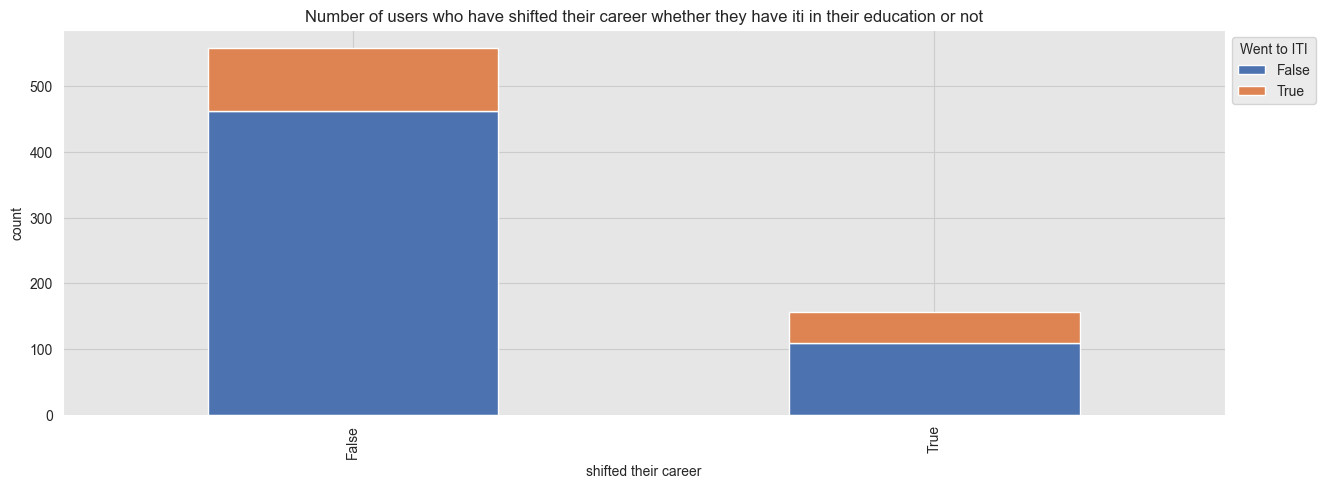

Number of users who have a related faculty in their education 558
Number of users who don't have a related faculty in their education 157


has_iti,False,True
shifted,,
False,463,95
True,109,48


In [160]:
cs_faculty = [
    'computer',
    'computing',
    'engineering',
    'information',
    'informatics',
    'software',
]
# for working_df, add a new column called shifted, it's true if the user don't have a cs_graduate faculty in his faculty_name column and false otherwise
working_df['shifted'] = np.where(working_df['faculty_name'].str.contains('|'.join(cs_faculty), case=False, regex=True), False, True)


# Draw a stack plot to show the percentage each faculty_name and title_tag for the shifted_df
segment_counts = working_df.groupby(['shifted', 'has_iti']).size().unstack()
# drop the did not specify column
# segment_counts = segment_counts.drop('did not specify', axis=1)
segment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.legend(title='Went to ITI', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Number of users who have shifted their career whether they have iti in their education or not')
plt.xlabel('shifted their career')
plt.ylabel('count')
plt.show()


# print the number of users who have a related faculty in their education and the number of users who don't have a related faculty in their education
print("Number of users who have a related faculty in their education", len(working_df[working_df['shifted'] == False]))
print("Number of users who don't have a related faculty in their education", len(working_df[working_df['shifted'] == True]))

segment_counts.head()

> #### _` QS:`_ People who are not a CS/CE graduates have to join ITI to be able to work in the software industry?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question, there are quite a few people who have shifted their careers and some of them have joined ITI  | _`Matches`_ |
>| The number of people who have shifted to the software industry and went to ITI is significantly bigger then those who didn't | - | - |
<br>

## Hypothesis Testing(McNemar's test)

McNemar's test is used to analyze paired categorical data, typically in a 2x2 contingency table. It assesses whether there is a significant difference in the marginal proportions between two related groups.

>> We can also interpret the results visually and say that there is a significant difference between the two groups.

In [161]:
from statsmodels.stats.contingency_tables import mcnemar
# >> Note: McNemar's test assumes that the observations are dependent, and it is typically used for matched or paired samples. 
# >> If the two groups in your data are independent, you may need to consider other statistical tests such as the chi-square test or Fisher's exact test.

# Hypothesis: There is a significant difference between the people who shifted their career and has ITI in their education and the people who shifted their career and don't have ITI in their education.
# Null Hypothesis: There is no significant difference between the people who shifted their career and has ITI in their education and the people who shifted their career and don't have ITI in their education.

# Create the contingency table
contingency_table = pd.crosstab(working_df['shifted'], working_df['has_iti'])

# Perform McNemar's test
result = mcnemar(contingency_table, correction=False)

# Output the results
print(f"McNemar's chi-square statistic: {result.statistic:.2f}")
print(f"P-value: {result.pvalue:.4f}")

# Interpret the results
certainty = 0.95
alpha = 1- certainty
if result.pvalue < alpha:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")


McNemar's chi-square statistic: 95.00
P-value: 0.3628
There is no significant difference between the two groups.


> #### _` QS:`_ People who are not a CS/CE graduates have to join ITI to be able to work in the software industry?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question, there is quit a few people who have shifted their career and some of them has joined ITI | _`Matches`_ |
>| The number of people who have shifted to the software industry and went to ITI is significantly bigger than those who didn't | Using the _`McNemar's test`_ we rejected the hypothesis| ❌ Our initial expectation does not align with the data we have collected. There's no obvious relation between shifting the career and joining ITI|
<br>

> #### _`New QS:`_ Does ITI affects some professions more than others?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| - | - |
>| ITI affects some professions more than others.| - | - |
<br>

In [162]:
def drawSegPlot(df, xlabel, ylabel, title, legend_title, groupBy1, groupBy2, figsize=(15, 5), n=3):
    segment_counts = df.groupby([groupBy1, groupBy2]).size().unstack()
    segment_counts = segment_counts.drop(segment_counts[segment_counts.sum(axis=1) < n].index, axis=0)
    segment_percents = segment_counts.div(segment_counts.sum(axis=1), axis=0) * 100
    segment_percents = segment_percents.sort_values(by=True, ascending=False)
    ax = segment_percents.plot(kind='bar', stacked=True, figsize=figsize)
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=8, color='black', fmt='%.1f%%', padding=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title=legend_title, bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()


## Distribution of the software fields for those who went to ITI and those who didn't (for people who shifted their careers)

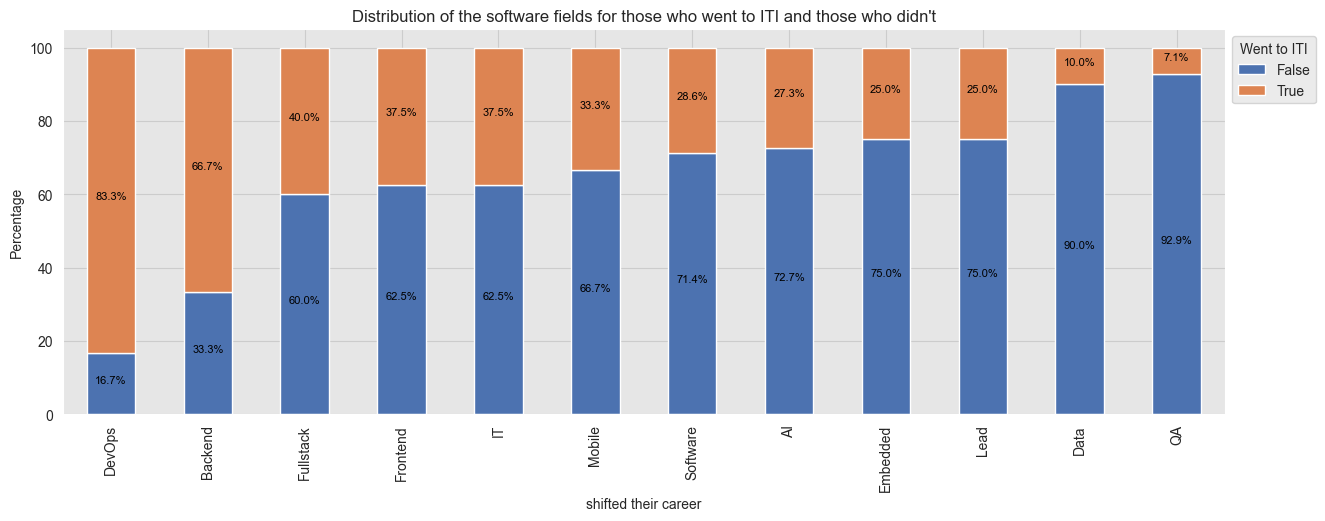

In [163]:

drawSegPlot(working_df[working_df['shifted'] == True], 'shifted their career', 'Percentage', 'Distribution of the software fields for those who went to ITI and those who didn\'t', 'Went to ITI', 'title_tag', 'has_iti' ,figsize=(15, 5), n=3)


## Distribution of the software fields for those who went to ITI and those who didn't (for the whole market)

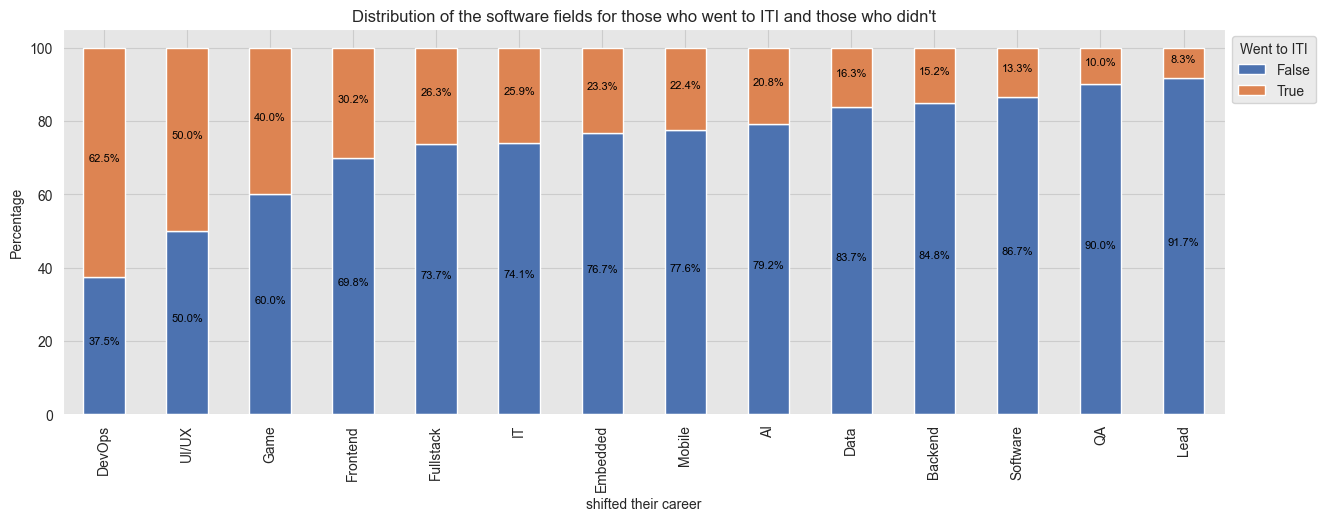

In [164]:
drawSegPlot(working_df, 'shifted their career', 'Percentage', 'Distribution of the software fields for those who went to ITI and those who didn\'t', 'Went to ITI', 'title_tag', 'has_iti' ,figsize=(15, 5), n=3)


> #### _`QS:`_ Does ITI affects some professions more than others?
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>| Question is answerable, there exist enough data to answer it.| We have enough data to answer the question, there is quit a few people who have shifted their career and some of them has joined ITI | _`Matches`_ |
>| ITI affects some professions more than others.| As we noticed from the previous graphs, ITI has an effect on some professions more than others | _`Matches`_  |
<br>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpreting Results</h1></div>

### As we have seen in the data and as we have concluded from the hypothesis testing, we found that ITI is not the only way to work in the software industry. There are many people who have shifted their careers to the software industry without joining ITI. However, some professions are more affected by ITI than others. For example, most of the people working in the DevOps field have joined ITI. This comes from the fact that our universities don't teach DevOps and most of the people working in this field had to join ITI to learn it. The same applies to the UI/UX field, game development, and other fields.

### Nevertheless, we can't deny the fact that ITI is one of the best ways to work in the software industry.